# Handwritten Image Classification 

This notebook is to explore how different machine learning perform on image classification. 


In [1]:
# imports for the day
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_lfw_people
import time
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

from skimage import io
from skimage.transform import resize
from skimage.color import rgb2gray

from PIL import Image

import plotly as py

/Users/adamdion/opt/anaconda3/envs/CSE801/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


### Load in and Explore the Data

In [2]:
# load the data
sk_data = load_digits()

In [3]:
sk_data.images[0]


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [4]:
#Cool slider to browse all of the images.
from ipywidgets import interact
def browse_images(images, labels, categories):
    n = len(images)
    def view_image(i):
        plt.imshow(images[i], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('%s' % categories[labels[i]])
        plt.axis('off')
        plt.show()
    interact(view_image, i=(0,n-1))

In [5]:
browse_images(sk_data.images, sk_data.target, sk_data.target_names)

interactive(children=(IntSlider(value=898, description='i', max=1796), Output()), _dom_classes=('widget-intera…

In [6]:
# Split up the data in features and labels
feature_vectors = sk_data.data
class_labels = sk_data.target
categories = sk_data.target_names

n_samples, n_features = feature_vectors.shape
N, h, w = sk_data.images.shape
n_classes = len(categories)

In [7]:
# Look at the data
print('The number of samples are: ', n_samples)
print('The number of features are: ', n_features)
print('The number of classes are: ', n_classes)
print('The shape of the image dimensions are: ',h, ' by ', w)

The number of samples are:  1797
The number of features are:  64
The number of classes are:  10
The shape of the image dimensions are:  8  by  8


### Distrubution of the data


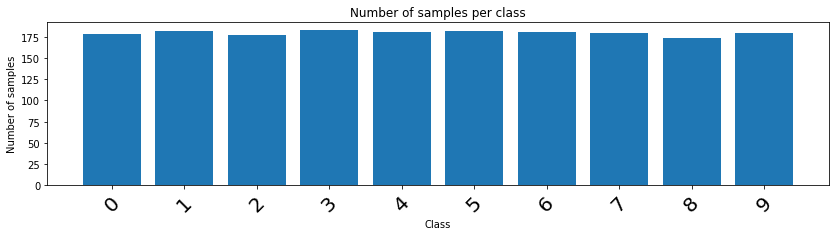

In [8]:
plt.figure(figsize=(14, 3))

y_unique = np.unique(class_labels)
counts = [(class_labels == i).sum() for i in y_unique]

plt.xticks(y_unique,  categories[y_unique])
locs, labels = plt.xticks()
plt.title('Number of samples per class')
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.setp(labels, rotation=45, size=20)
_ = plt.bar(y_unique, counts)

## Split into train and test data sets

In [9]:
# Split into a training set and a testing set
train_vectors,test_vectors,train_labels,test_labels = train_test_split(feature_vectors,class_labels,train_size=.75)

print('The number of training samples are: ', train_vectors.shape[0])
print('The number of testing samples are: ', test_vectors.shape[0])

The number of training samples are:  1347
The number of testing samples are:  450


## Training and Testing all ML algorithms on the data

### SVM

In [18]:
# Train a SVM classification model

# count time taken to train
start = time.time()

# temporary variables 
tmp_vectors = train_vectors
tmp_labels = train_labels


clf = SVC(kernel='linear', class_weight='balanced')
# we have a "good" classifier (according to GridSearchCV), how's it look
clf = clf.fit(tmp_vectors, tmp_labels)



In [16]:
# Quantitative evaluation of the model quality on the test set

#make some temporary variables so you can change this easily
predict_vectors = test_vectors
true_labels = test_labels

print("Predicting names on the test set")
pred_labels = clf.predict(predict_vectors)

print(classification_report(true_labels, pred_labels))
svc_accuracy = clf.score(predict_vectors, true_labels)
svc_precision = precision_score(true_labels, pred_labels, average='weighted')
svc_recall = recall_score(true_labels, pred_labels, average='weighted')
svc_f1 = f1_score(true_labels, pred_labels, average='weighted')

Predicting names on the test set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.96      0.98      0.97        45
           2       1.00      1.00      1.00        43
           3       1.00      0.96      0.98        54
           4       1.00      1.00      1.00        40
           5       0.94      0.98      0.96        46
           6       1.00      1.00      1.00        50
           7       1.00      1.00      1.00        49
           8       0.95      0.93      0.94        43
           9       0.92      0.92      0.92        38

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



### K Nearest Neighbor

In [19]:
# Train a KNN classification model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_vectors, train_labels)

# KNN stats
print("Classification report for KNN classifier:")
print(classification_report(test_labels, knn.predict(test_vectors)))
knn_accuracy = knn.score(test_vectors, test_labels)
knn_precision = precision_score(test_labels, knn.predict(test_vectors), average='weighted')
knn_recall = recall_score(test_labels, knn.predict(test_vectors), average='weighted')
knn_f1 = f1_score(test_labels, knn.predict(test_vectors), average='weighted')

Classification report for KNN classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.96      1.00      0.98        45
           2       1.00      1.00      1.00        43
           3       0.98      0.98      0.98        54
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        46
           6       1.00      1.00      1.00        50
           7       1.00      1.00      1.00        49
           8       0.98      0.95      0.96        43
           9       1.00      0.97      0.99        38

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



### Naive Bayes

In [20]:
# Use Naive Bayes to classify the data
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_vectors, train_labels)

# Naive Bayes stats
print("Classification report for Naive Bayes classifier:")
print(classification_report(test_labels, gnb.predict(test_vectors)))
naive_bayes_accuracy = gnb.score(test_vectors, test_labels)
naive_bayes_precision = precision_score(test_labels, gnb.predict(test_vectors), average='macro')
naive_bayes_recall = recall_score(test_labels, gnb.predict(test_vectors), average='macro')
naive_bayes_f1 = f1_score(test_labels, gnb.predict(test_vectors), average='macro')

Classification report for Naive Bayes classifier:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       0.90      0.82      0.86        45
           2       0.97      0.77      0.86        43
           3       0.91      0.74      0.82        54
           4       1.00      0.93      0.96        40
           5       0.89      0.89      0.89        46
           6       0.98      1.00      0.99        50
           7       0.73      1.00      0.84        49
           8       0.61      0.81      0.70        43
           9       0.97      0.74      0.84        38

    accuracy                           0.87       450
   macro avg       0.89      0.87      0.87       450
weighted avg       0.89      0.87      0.87       450



### Bayes Net

In [21]:
# Use Bayes Net to classify the data
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(train_vectors, train_labels)

# Bayes Net stats
print("Classification report for Bayes Net classifier:")
print(classification_report(test_labels, bnb.predict(test_vectors)))
bnb_accuracy = bnb.score(test_vectors, test_labels)
bnb_precision = precision_score(test_labels, bnb.predict(test_vectors), average='macro')
bnb_recall = recall_score(test_labels, bnb.predict(test_vectors), average='macro')
bnb_f1 = f1_score(test_labels, bnb.predict(test_vectors), average='macro')

Classification report for Bayes Net classifier:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        42
           1       0.75      0.60      0.67        45
           2       0.78      0.93      0.85        43
           3       0.92      0.89      0.91        54
           4       0.93      0.97      0.95        40
           5       0.95      0.80      0.87        46
           6       0.98      0.98      0.98        50
           7       0.92      1.00      0.96        49
           8       0.76      0.74      0.75        43
           9       0.76      0.84      0.80        38

    accuracy                           0.88       450
   macro avg       0.87      0.88      0.87       450
weighted avg       0.88      0.88      0.88       450



### Decision Tree

In [22]:
# Use Decision Tree to classify the data
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(train_vectors, train_labels)

# Decision Tree stats
print("Classification report for Decision Tree classifier:")
print(classification_report(test_labels, dtc.predict(test_vectors)))
dtc_accuracy = dtc.score(test_vectors, test_labels)
dtc_precision = precision_score(test_labels, dtc.predict(test_vectors), average='weighted')
dtc_recall = recall_score(test_labels, dtc.predict(test_vectors), average='weighted')
dtc_f1 = f1_score(test_labels, dtc.predict(test_vectors), average='weighted')

Classification report for Decision Tree classifier:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        42
           1       0.82      0.82      0.82        45
           2       0.86      0.88      0.87        43
           3       0.87      0.85      0.86        54
           4       0.75      0.82      0.79        40
           5       0.84      0.80      0.82        46
           6       0.88      0.92      0.90        50
           7       0.98      0.90      0.94        49
           8       0.89      0.79      0.84        43
           9       0.80      0.84      0.82        38

    accuracy                           0.86       450
   macro avg       0.86      0.86      0.86       450
weighted avg       0.86      0.86      0.86       450



### Random Forest

In [23]:
# Use Random Forest to classify the data
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(train_vectors, train_labels)

# Random Forest stats
print("Classification report for Random Forest classifier:")
print(classification_report(test_labels, rfc.predict(test_vectors)))
rfc_accuracy = rfc.score(test_vectors, test_labels)
rfc_precision = precision_score(test_labels, rfc.predict(test_vectors), average='weighted')
rfc_recall = recall_score(test_labels, rfc.predict(test_vectors), average='weighted')
rfc_f1 = f1_score(test_labels, rfc.predict(test_vectors), average='weighted')

Classification report for Random Forest classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.96      1.00      0.98        45
           2       1.00      1.00      1.00        43
           3       1.00      0.94      0.97        54
           4       0.97      0.97      0.97        40
           5       0.96      0.98      0.97        46
           6       1.00      1.00      1.00        50
           7       0.98      1.00      0.99        49
           8       0.98      0.93      0.95        43
           9       0.95      0.97      0.96        38

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



### Neural Network

In [24]:
# Use Neural Network to classify the data
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(train_vectors, train_labels)

# Neural Network stats
print("Classification report for Neural Network classifier:")
print(classification_report(test_labels, mlp.predict(test_vectors)))
mlp_accuracy = mlp.score(test_vectors, test_labels)
mlp_precistion = precision_score(test_labels, mlp.predict(test_vectors), average='weighted')
mlp_recall = recall_score(test_labels, mlp.predict(test_vectors), average='weighted')
mlp_f1 = f1_score(test_labels, mlp.predict(test_vectors), average='weighted')

Classification report for Neural Network classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.93      0.96      0.95        45
           2       1.00      1.00      1.00        43
           3       0.98      0.96      0.97        54
           4       0.98      1.00      0.99        40
           5       0.94      0.96      0.95        46
           6       0.98      1.00      0.99        50
           7       1.00      1.00      1.00        49
           8       0.95      0.93      0.94        43
           9       0.97      0.92      0.95        38

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



## Graph results of each classifier 

In [25]:
# Plotly bar chat of accuracy
import plotly.express as px
import plotly.graph_objs as go

fig = go.Figure(data=[
    go.Bar(name='SVC', x=['SVC'], y=[svc_accuracy]),
    go.Bar(name='KNN', x=['KNN'], y=[knn_accuracy]),
    go.Bar(name='Naive Bayes', x=['Naive Bayes'], y=[naive_bayes_accuracy]),
    go.Bar(name='Bayes Net', x=['Bayes Net'], y=[bnb_accuracy]),
    go.Bar(name='Decision Tree', x=['Decision Tree'], y=[dtc_accuracy]),
    go.Bar(name='Random Forest', x=['Random Forest'], y=[rfc_accuracy]),
    go.Bar(name='Neural Network', x=['Neural Network'], y=[mlp_accuracy])
])
# add title
fig.update_layout(title_text='Accuracy of Classifiers', xaxis_title="Classifier", yaxis_title="Accuracy")
fig.update_layout(barmode='group')
fig.show()




In [26]:
# grouped bat plot of each model precision, recall, and f1 score and accuracy
figure = go.Figure(data=[
    go.Bar(name='Precision', x=['SVC', 'KNN', 'Naive Bayes', 'Bayes Net', 'Decision Tree', 'Random Forest', 'Neural Network'], y=[svc_precision, knn_precision, naive_bayes_precision, bnb_precision, dtc_precision, rfc_precision, mlp_precistion]),
    go.Bar(name='Recall', x=['SVC', 'KNN', 'Naive Bayes', 'Bayes Net', 'Decision Tree', 'Random Forest', 'Neural Network'], y=[svc_recall, knn_recall, naive_bayes_recall, bnb_recall, dtc_recall, rfc_recall, mlp_recall]),
    go.Bar(name='F1', x=['SVC', 'KNN', 'Naive Bayes', 'Bayes Net', 'Decision Tree', 'Random Forest', 'Neural Network'], y=[svc_f1, knn_f1, naive_bayes_f1, bnb_f1, dtc_f1, rfc_f1, mlp_f1]),
    go.Bar(name='Accuracy', x=['SVC', 'KNN', 'Naive Bayes', 'Bayes Net', 'Decision Tree', 'Random Forest', 'Neural Network'], y=[svc_accuracy, knn_accuracy, naive_bayes_accuracy, bnb_accuracy, dtc_accuracy, rfc_accuracy, mlp_accuracy])
])
# start x axis at 0.6
figure.update_yaxes(range=[0.5, 1])
# Change the bar mode
figure.update_layout(barmode='group')
figure.update_layout(title_text='Precision, Recall, F1, and Accuracy of Classifiers', xaxis_title="Classifier", yaxis_title="Score")
figure.show()


## Summary of Classifiers 

There are 4 classifiers that performed much better then others. SVC, KNN, Randoom Forest, and Neural Networks all performed very well on a variety of metrics. They all scored 97% and up for precision, recall, F1 and accuracy. All of these machine learning models will perform very well to predict values corrently. 

Nect, we will make out own examples and test how the best performing models predict them.





## Predicting Own Handwritting with Neural Network

In [27]:
def format_png_image(image):
    image = resize(image, (8, 8))
    # Make shape from 8x8x4 to 8x8
    image = image[:,:,0]
    # flip the dark and light colors
    image = 1 - image
    # reshape 
    image = image.reshape(1, -1)
    # transofrm into int from 0 - 16
    image = image * 32
    # round to nearest int
    image = np.round(image)
    return image

(-0.5, 7.5, 7.5, -0.5)

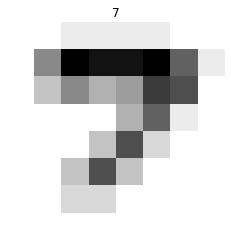

In [28]:
test_img_7 = format_png_image(io.imread('word_7.png'))
knn_predicted7 = mlp.predict(test_img_7)
# show the image
plt.imshow(test_img_7.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('%s' % categories[knn_predicted7[0]])
plt.axis('off')

(-0.5, 7.5, 7.5, -0.5)

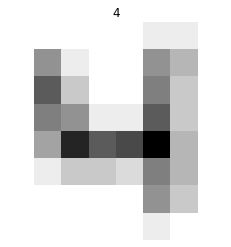

In [29]:
test_img_4 = format_png_image(io.imread('word_4.png'))

knn_predited4 = mlp.predict(test_img_4)
# show the image
plt.imshow(test_img_4.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('%s' % categories[knn_predited4[0]])
plt.axis('off')

(-0.5, 7.5, 7.5, -0.5)

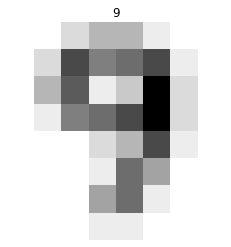

In [197]:
test_img_9 = format_png_image(io.imread('word_9.png'))

knn_predited9 = mlp.predict(test_img_9)
# show the image
plt.imshow(test_img_9.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('%s' % categories[knn_predited9[0]])
plt.axis('off')

(-0.5, 7.5, 7.5, -0.5)

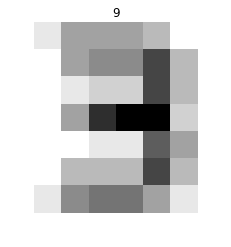

In [198]:
test_img_3= format_png_image(io.imread('word_3.png'))

knn_predited3 = mlp.predict(test_img_3)
# show the image
plt.imshow(test_img_3.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('%s' % categories[knn_predited3[0]])
plt.axis('off')

(-0.5, 7.5, 7.5, -0.5)

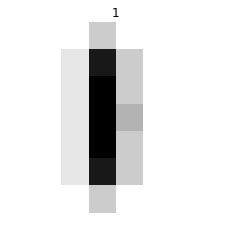

In [199]:
test_img_1= format_png_image(io.imread('word_1.png'))

knn_predited1 = mlp.predict(test_img_1)
# show the image
plt.imshow(test_img_1.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('%s' % categories[knn_predited1[0]])
plt.axis('off')

# Predict with K Neraest Neighbor

(-0.5, 7.5, 7.5, -0.5)

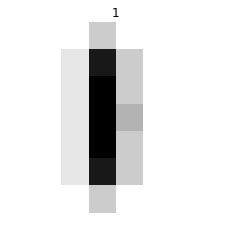

In [193]:
# test image 1 
test_img_1= format_png_image(io.imread('word_1.png'))

knn_predited1 = knn.predict(test_img_1)
# show the image
plt.imshow(test_img_1.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('%s' % categories[knn_predited1[0]])
plt.axis('off')

(-0.5, 7.5, 7.5, -0.5)

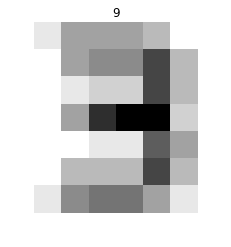

In [194]:
# test image 3
test_img_3= format_png_image(io.imread('word_3.png'))

knn_predited3 = knn.predict(test_img_3)
# show the image
plt.imshow(test_img_3.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('%s' % categories[knn_predited3[0]])
plt.axis('off')

(-0.5, 7.5, 7.5, -0.5)

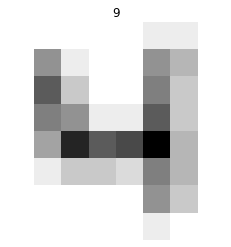

In [202]:
# test image 4
test_img_4 = format_png_image(io.imread('word_4.png'))

knn_predited4 = knn.predict(test_img_4)
# show the image
plt.imshow(test_img_4.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('%s' % categories[knn_predited4[0]])
plt.axis('off')

(-0.5, 7.5, 7.5, -0.5)

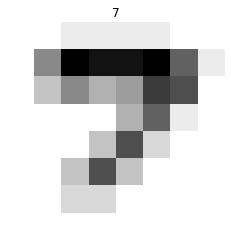

In [203]:
# test image 7
test_img_7 = format_png_image(io.imread('word_7.png'))

knn_predited7 = knn.predict(test_img_7)
# show the image
plt.imshow(test_img_7.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('%s' % categories[knn_predited7[0]])
plt.axis('off')

(-0.5, 7.5, 7.5, -0.5)

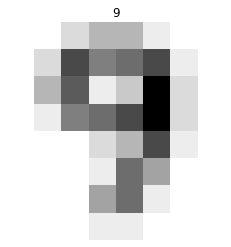

In [204]:
# test image 4
test_img_9 = format_png_image(io.imread('word_9.png'))

knn_predited9 = knn.predict(test_img_9)
# show the image
plt.imshow(test_img_9.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('%s' % categories[knn_predited9[0]])
plt.axis('off')